## Reinforcement Learning
## Project: Frozen Lake

The Frozen Lake environment is a 4×4 grid which contain four possible features  — Safe (S), Frozen (F), Hole (H) and Goal (G). The agent moves around the grid until it reaches the goal or hole. If it falls into the hole, it has to start from the beginning and is rewarded the value 0. The process continues until it learns from every mistake and eventually reaches the goal . Here is visual description of the Frozen Lake grid (4×4):

![](Frozen-Lake.png)

       ( This picture is collected from web )


-----

## Step 0: Getting Started
It can go left, right, up and down.

SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
Examine the State and Action Spaces
At each time step, it has four actions at its disposal:

0 - up
1 - down
2 - left
3 - right

![](reinforcement-learning-fig1-700.jpg)

                                General RL topology

In [1]:
import numpy as np
import random
import gym
# Pretty display for notebooks
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Create FrozenLake environment
* Here we'll create the FrozenLake environment.
* OpenAI Gym is a library provides many environments that we can use to train our agents.
* In our case we choose to use Frozen Lake.

In [2]:
#create environment
env = gym.make('FrozenLake-v0')


## STEP 2: Create Q-Table and initialize it


In [3]:
state_size = env.observation_space.n
action_size = env.action_space.n

print('Number of actions:', action_size)

# examine the state space 
print('States have length:', state_size)
q_table = np.zeros((state_size, action_size))
print(q_table)

Number of actions: 4
States have length: 16
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Step 3: hyper param values

In [4]:
num_episodes = 100000            # Total episodes
max_steps_per_episodes = 100    # Max steps per episode
learning_rate = 0.7             # Learning rate
discount_rate = 0.99            # Discounting rate

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001  # Exponential decay rate for exploration
print_every = 1000              # Print rewards at every 1000 episodes

## Q-Learning Algorithm

In [7]:
rewards = []
# Q-Learning algo

for episode in range(num_episodes):
    state = env.reset()
    done = False
    score = 0;
    for step in range( max_steps_per_episodes):
        #env.render()
#    while True:
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        next_state, reward, done, info = env.step(action)
#update q table for Q(s,a)
        q_table[state, action] = q_table[state,action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[next_state,:]))
  #          Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])

        state = next_state
        score += reward
        if done:
            break
    # Reduce epsilon (because we need less and less exploration)
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    rewards.append(score) 
    #env.render()

    if episode % print_every == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(rewards)))



Episode 0	Average Score: 0.00
Episode 1000	Average Score: 0.03
Episode 2000	Average Score: 0.06
Episode 3000	Average Score: 0.11
Episode 4000	Average Score: 0.17
Episode 5000	Average Score: 0.23
Episode 6000	Average Score: 0.28
Episode 7000	Average Score: 0.32
Episode 8000	Average Score: 0.34
Episode 9000	Average Score: 0.37
Episode 10000	Average Score: 0.39
Episode 11000	Average Score: 0.40
Episode 12000	Average Score: 0.41
Episode 13000	Average Score: 0.42
Episode 14000	Average Score: 0.43
Episode 15000	Average Score: 0.43
Episode 16000	Average Score: 0.44
Episode 17000	Average Score: 0.44
Episode 18000	Average Score: 0.45
Episode 19000	Average Score: 0.45
Episode 20000	Average Score: 0.45
Episode 21000	Average Score: 0.46
Episode 22000	Average Score: 0.46
Episode 23000	Average Score: 0.47
Episode 24000	Average Score: 0.47
Episode 25000	Average Score: 0.47
Episode 26000	Average Score: 0.47
Episode 27000	Average Score: 0.47
Episode 28000	Average Score: 0.48
Episode 29000	Average Score

In [8]:
print ("Reward Sum on all episodes " + str(sum(rewards)/num_episodes))

#Print updated Q table
print( "********** Q TABLE ********\n")
print(q_table)

Reward Sum on all episodes 0.5205
********** Q TABLE ********

[[5.54154239e-01 4.97649148e-01 4.64100062e-01 4.88555828e-01]
 [2.15800202e-01 2.34385806e-01 4.04414024e-01 5.27415966e-01]
 [2.01403059e-01 2.12287945e-01 1.96462070e-01 4.18618177e-01]
 [3.61642154e-01 2.62079092e-02 2.20349259e-01 4.50843276e-01]
 [6.17218608e-01 4.67944197e-01 4.63533141e-02 4.57858729e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.38526839e-04 1.80083255e-03 6.12199557e-01 1.18684725e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.29112362e-03 4.85963142e-02 1.26587468e-02 7.55289283e-01]
 [5.09321487e-03 8.40417574e-01 5.29077102e-02 2.08553460e-02]
 [8.91495603e-01 1.86296952e-02 1.52039850e-02 7.87373730e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.90193720e-01 8.40550436e-02 9.26857529e-01 2.05255108e-01]
 [6.32972283e-01 9.87600904e-01 5.58811661e-01 6.127223

## Step 5: Use Q-Table to play 

In [9]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps_per_episodes):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 14
****************************************************
EPISODE  1
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 58
****************************************************
EPISODE  2
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 19
****************************************************
EPISODE  3
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 11
****************************************************
EPISODE  4
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 21


# Improving Q-Learning: DQN ( Deep Q LEarning )

Deep Q Learning algorithm represents the optimal action-value function q, as a neural network instead of a table.

In [5]:
# import additianl packeages
import torch
from collections import deque

## Instantiate Agent

### This is an untrained agent

In [6]:
from dqn_agent import Agent
from torch.autograd import Variable
agent = Agent(state_size=1, action_size=action_size, seed=0)

# watch an untrained agent
state = env.reset()  # state is a int number corresponding to the agent's position in a board
curr_state_encoded = np.eye(16)[state].reshape(16,1)
#print(curr_state_encoded)

for j in range(500):
    action = agent.act(curr_state_encoded)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

(16, 1)
torch.Size([1, 16, 1])

SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([1, 16, 1])
  (Up)
SFFF
FHFH
FFFH
HFFG
(16, 1)
torch.Size([

## Train the Agent with DQN

In [7]:
def to_onehot(size,value):
    """1 hot encoding for observed state"""
    return np.eye(size)[value]

In [8]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()

        score = 0
        for t in range(max_t):
            curr_state_encoded = to_onehot(state_size, state).reshape(1,state_size)
            #print ( curr_state_encoded.shape )
            action = agent.act(curr_state_encoded, eps)
            next_state, reward, done, _ = env.step(action)
            next_state_encoded = to_onehot(state_size, next_state).reshape(1, state_size)
            agent.step(curr_state_encoded, action, reward, next_state_encoded, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return scores



In [9]:
scores = dqn()


(1, 16)
torch.Size([1, 1, 16])


RuntimeError: size mismatch, m1: [1 x 16], m2: [1 x 16] at /Users/soumith/miniconda2/conda-bld/pytorch_1532623076075/work/aten/src/TH/generic/THTensorMath.cpp:2070

NameError: name 'scores' is not defined

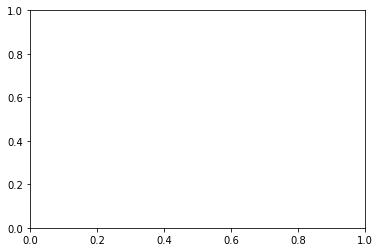

In [23]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()